In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from utils import train_test_val_split, normalize_datasets

In [2]:
inlets = pd.read_csv("../datasets/all_inlets.csv", index_col="Time")
inlets = inlets.add_prefix("inlet_")

outlets = pd.read_csv("../datasets/all_outlets.csv", index_col="Time")
outlets = outlets.add_prefix("outlet_")

In [3]:
inlet_temp_cols = list(inlets.columns)
outlet_temp_cols = list(outlets.columns)
del inlet_temp_cols[:2] # delete 'inlet_Case_id' and 'inlet_fan_speed'
del outlet_temp_cols[:2] # delete 'outlet_Case_id' and 'outlet_fan_speed'

In [4]:
df = pd.concat([inlets, outlets], axis=1)

In [5]:
print(df[outlet_temp_cols].min().min())
print(df[inlet_temp_cols].min().min())
print(df[outlet_temp_cols].max().max())
print(df[inlet_temp_cols].max().max())

9.08
9.08
33.12
33.12


In [6]:
df.to_csv("../datasets/df.csv", index=False)

In [7]:
len(df)

1752

In [8]:
df['inlet_Case_id'].value_counts()

5    783
4    371
3    211
2    204
1    183
Name: inlet_Case_id, dtype: int64

In [9]:
df['inlet_Case_id'].value_counts() / len(df)

5    0.446918
4    0.211758
3    0.120434
2    0.116438
1    0.104452
Name: inlet_Case_id, dtype: float64

In [10]:
case_1 = df[df['inlet_Case_id'] == 1]
case_2 = df[df['inlet_Case_id'] == 2]
case_3 = df[df['inlet_Case_id'] == 3]
case_4 = df[df['inlet_Case_id'] == 4]
case_5 = df[df['inlet_Case_id'] == 5]

In [11]:
# Drop Case id columns
case_1 = case_1.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_2 = case_2.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_3 = case_3.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_4 = case_4.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_5 = case_5.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)

# Visualization

## Case 1

### Preprocessing

In [12]:
case_1 = normalize_datasets(case_1, outlet_temp_cols, inlet_temp_cols)

In [13]:
train_c1, test_c1, val_c1 = train_test_val_split(case_1, test_size=1)

### Fan Speed

#### Inlets

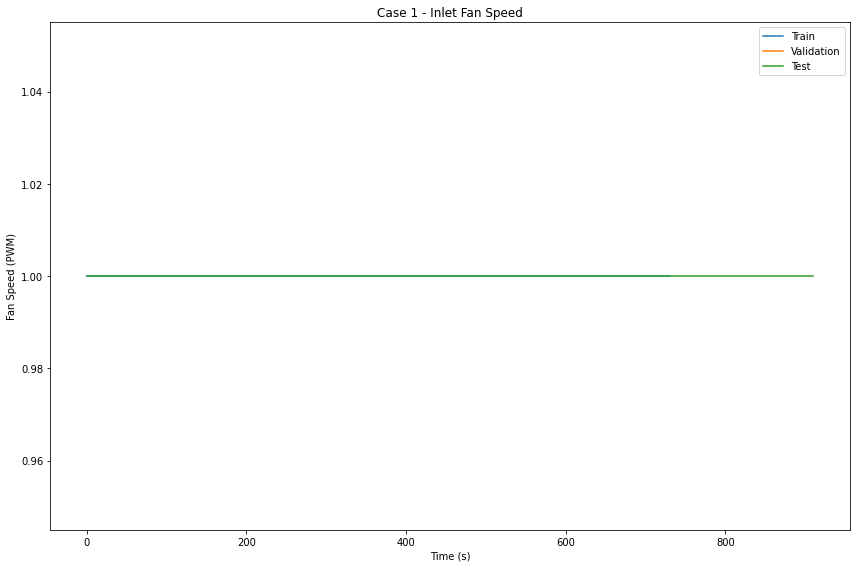

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
train_c1['inlet_fan_speed'].plot(label="Train")
val_c1['inlet_fan_speed'].plot(label="Validation")
test_c1['inlet_fan_speed'].plot(label="Test")

plt.title("Case 1 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()
plt.tight_layout()

plt.savefig("../plots/preprocessing/case1_inlet_fan_speed.jpg", dpi=300)

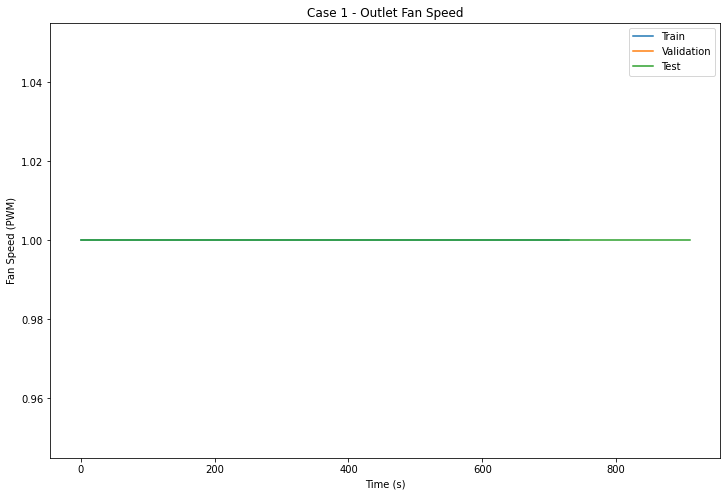

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
train_c1['outlet_fan_speed'].plot(label="Train")
val_c1['outlet_fan_speed'].plot(label="Validation")
test_c1['outlet_fan_speed'].plot(label="Test")

plt.title("Case 1 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case1_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

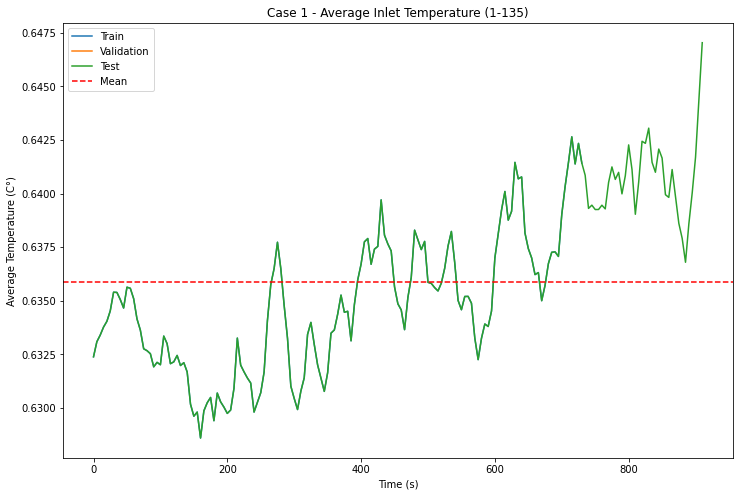

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

train_c1[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c1[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c1[inlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_1[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# plt.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 1 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

plt.legend()

plt.savefig("../plots/preprocessing/case1_inlet_temp.jpg", dpi=300)

#### Outlets

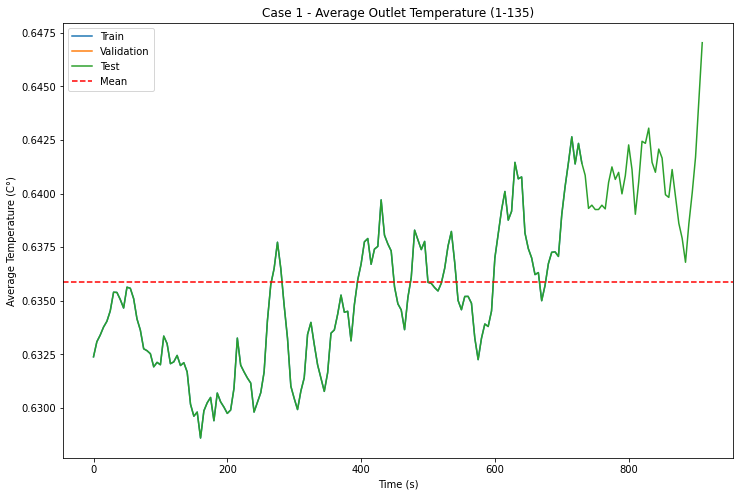

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

train_c1[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c1[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c1[outlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_1[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 1 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")
plt.legend()

plt.savefig("../plots/preprocessing/case1_outlet_temp.jpg", dpi=300)

In [18]:
case_1.to_csv('../datasets/case_1.csv')

## Case 2

In [19]:
case_2 = normalize_datasets(case_2, outlet_temp_cols, inlet_temp_cols)

In [20]:
train_c2, test_c2, val_c2 = train_test_val_split(case_2, test_size=0)

### Fan Speed

#### Inlets

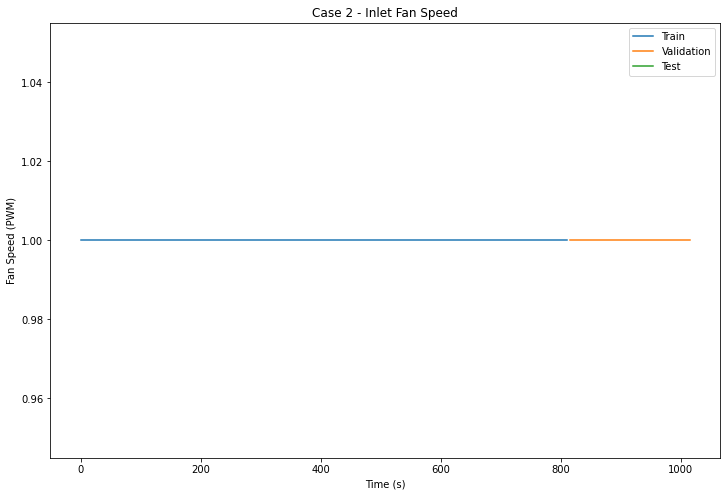

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["inlet_fan_speed"].plot(label="Train")
val_c2["inlet_fan_speed"].plot(label="Validation")
test_c2["inlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_fan_speed.jpg", dpi=300)

#### Outlets

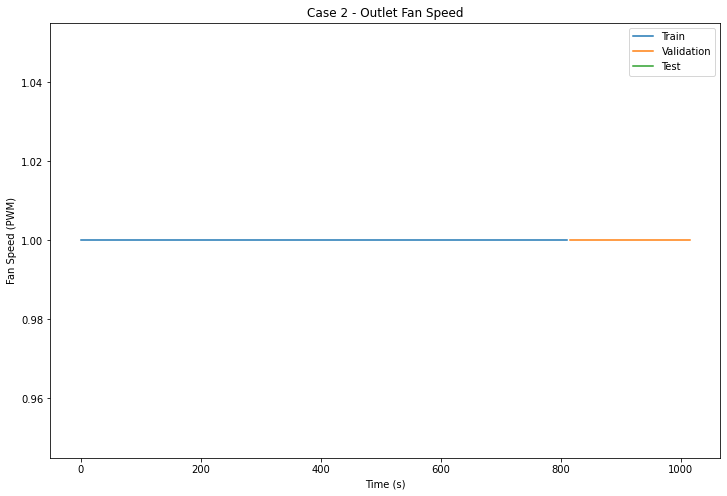

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["outlet_fan_speed"].plot(label="Train")
val_c2["outlet_fan_speed"].plot(label="Validation")
test_c2["outlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

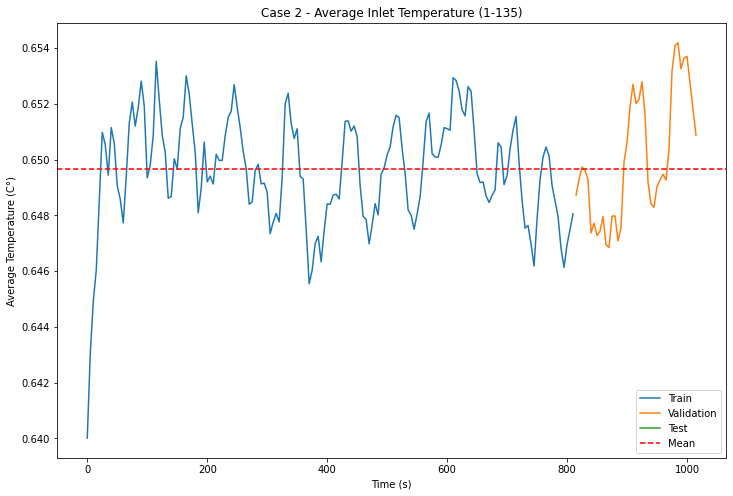

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c2[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c2[inlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_2[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_temp.jpg", dpi=300)

#### Outlets

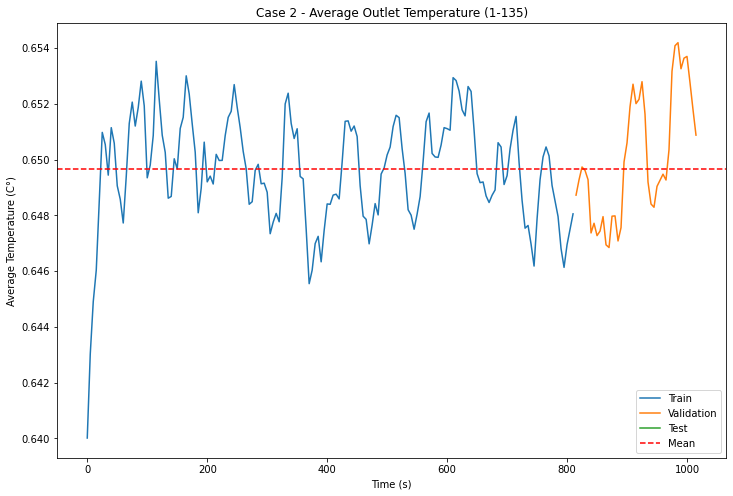

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c2[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c2[outlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_2[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 

plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_temp.jpg", dpi=300)

In [25]:
case_2.to_csv('../datasets/case_2.csv')

## Case 3

In [26]:
case_3 = normalize_datasets(case_3, outlet_temp_cols, inlet_temp_cols)

In [27]:
train_c3, test_c3, val_c3 = train_test_val_split(case_3, test_size=0)

### Inlet Fan Speed

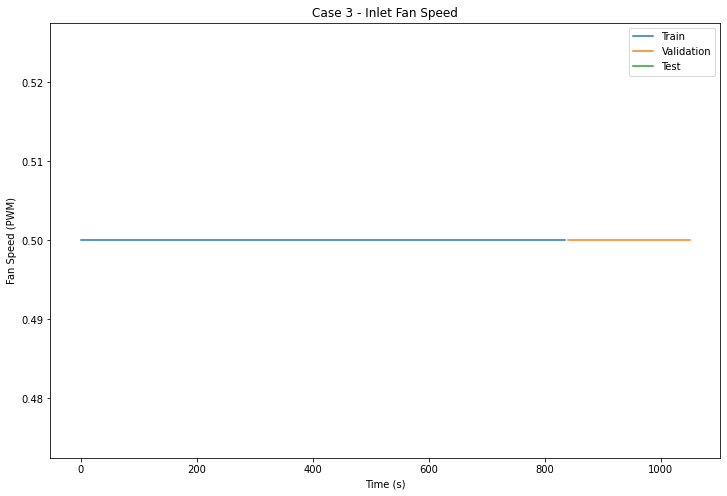

In [28]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["inlet_fan_speed"].plot(label="Train")
val_c3["inlet_fan_speed"].plot(label="Validation")
test_c3["inlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

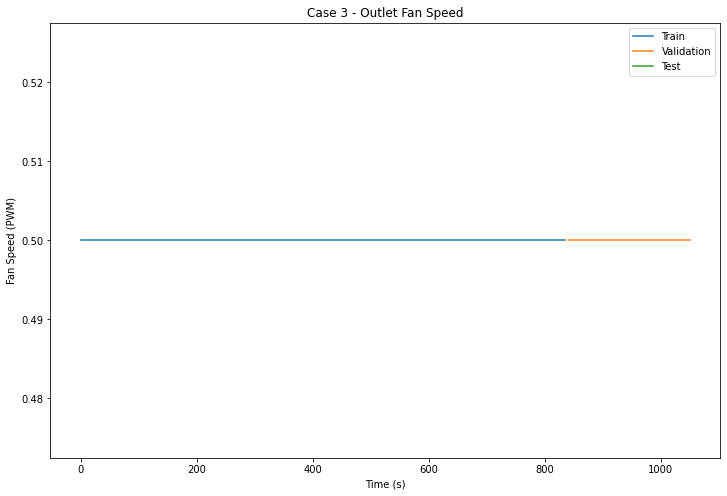

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["outlet_fan_speed"].plot(label="Train")
val_c3["outlet_fan_speed"].plot(label="Validation")
test_c3["outlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

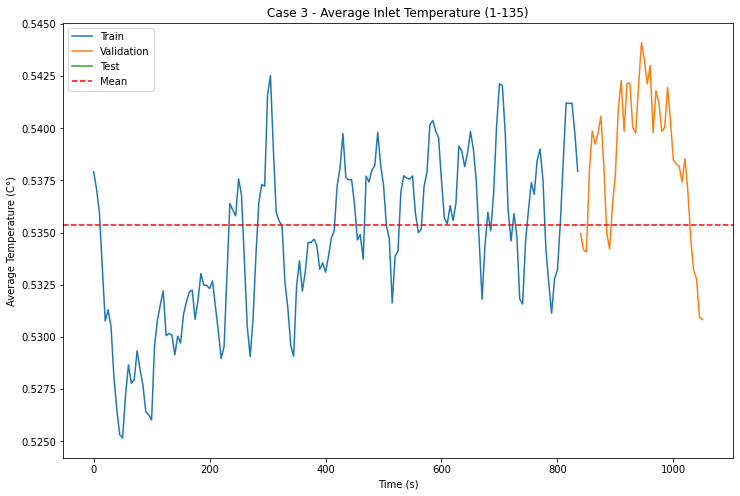

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c3[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c3[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 3 - Average Inlet Temperature (1-135)")
plt.ylabel("Average Temperature (C°)")
plt.xlabel("Time (s)")

mean = case_3[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

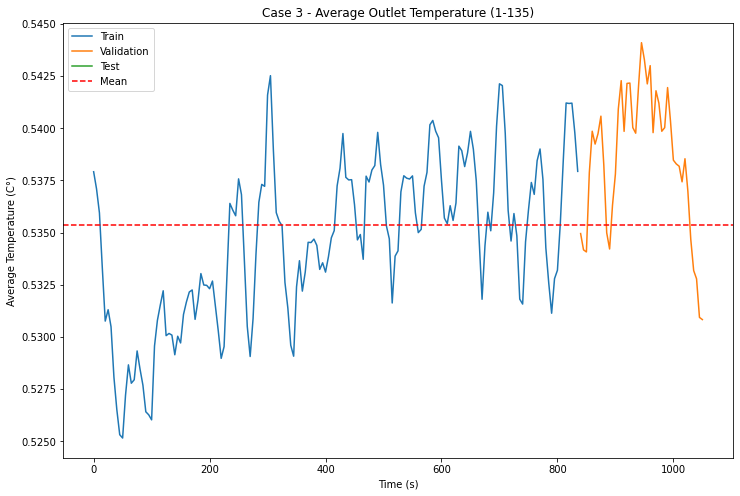

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c3[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c3[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 3 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_3[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_temp.jpg", dpi=300)

In [32]:
case_3.to_csv('../datasets/case_3.csv')

## Case 4

In [33]:
case_4 = normalize_datasets(case_4, outlet_temp_cols, inlet_temp_cols)

In [34]:
train_c4, test_c4, val_c4 = train_test_val_split(case_4, test_size=0)

### Inlet Fan Speed

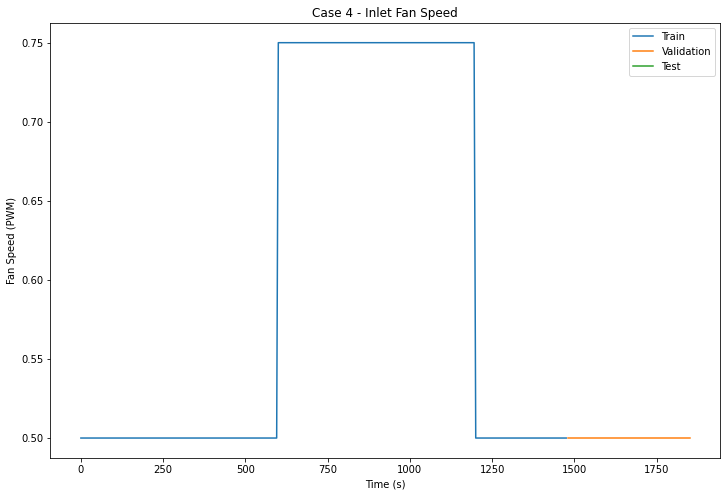

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["inlet_fan_speed"].plot(label="Train")
val_c4["inlet_fan_speed"].plot(label="Validation")
test_c4["inlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

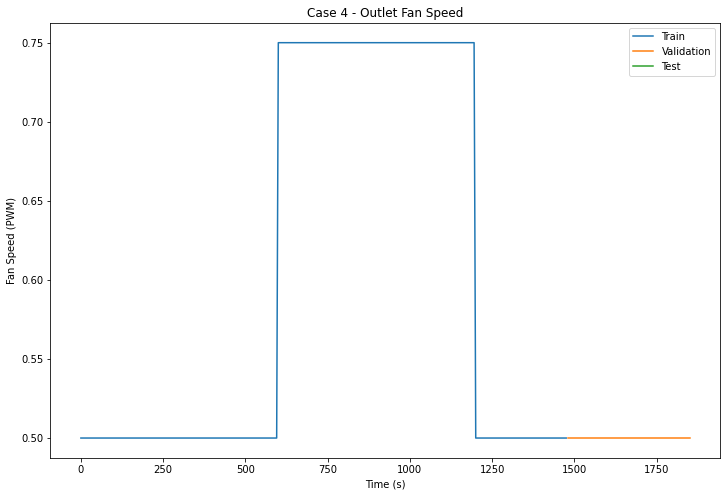

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["outlet_fan_speed"].plot(label="Train")
val_c4["outlet_fan_speed"].plot(label="Validation")
test_c4["outlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

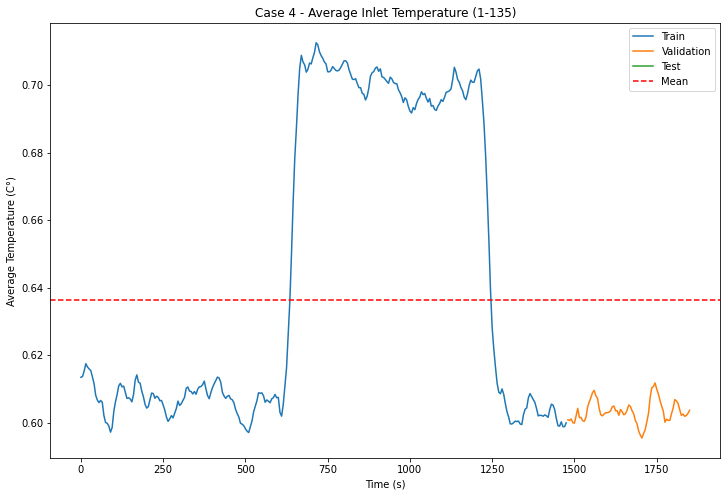

In [37]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c4[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c4[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 4 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

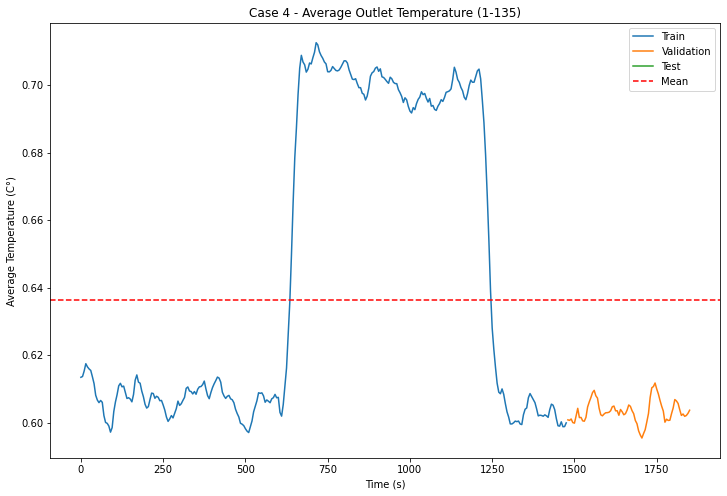

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c4[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c4[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 4 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_temp.jpg", dpi=300)

In [39]:
case_4.to_csv('../datasets/case_4.csv')

## Case 5

In [40]:
case_5 = normalize_datasets(case_5, outlet_temp_cols, inlet_temp_cols)

In [41]:
train_c5, test_c5, val_c5 = train_test_val_split(case_5, test_size=0)

### Inlet Fan Speed

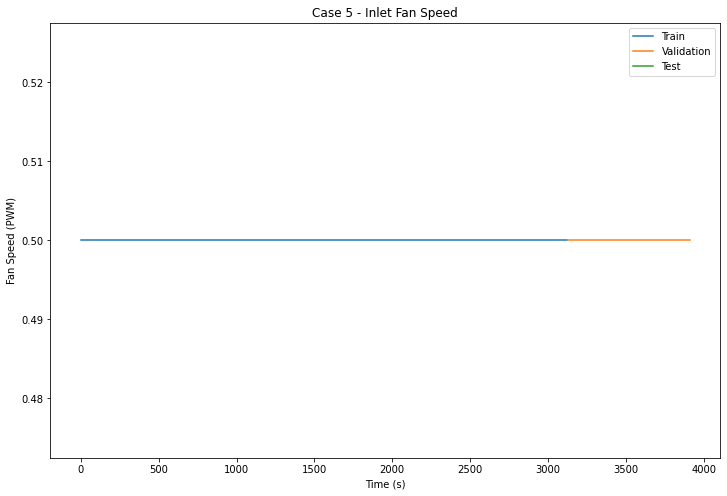

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["inlet_fan_speed"].plot(label="Train")
val_c5["inlet_fan_speed"].plot(label="Validation")
test_c5["inlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

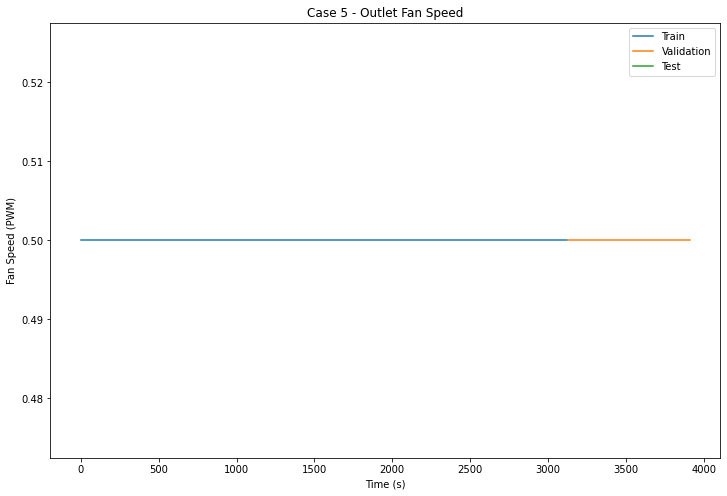

In [43]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["outlet_fan_speed"].plot(label="Train")
val_c5["outlet_fan_speed"].plot(label="Validation")
test_c5["outlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperature

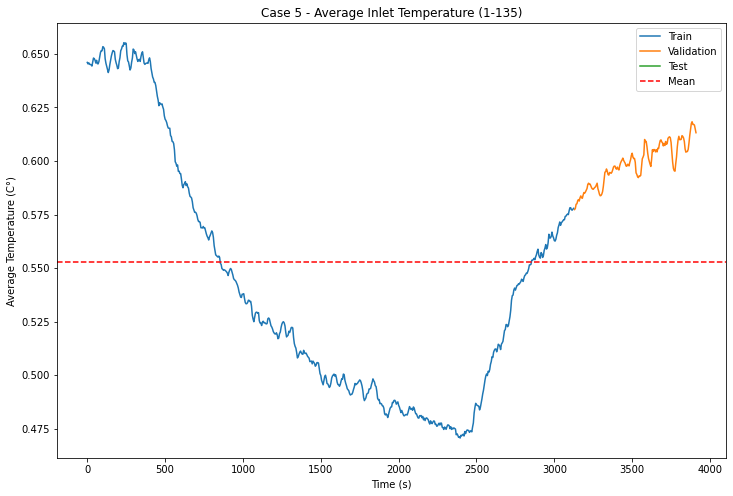

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c5[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c5[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 5 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_temp.jpg", dpi=300)

### Outlet Temperature

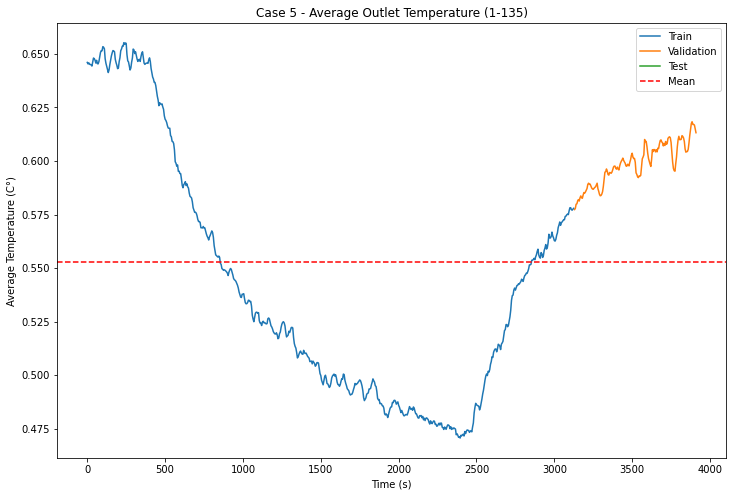

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c5[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c5[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 5 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_temp.jpg", dpi=300)

In [46]:
case_5.to_csv('../datasets/case_5.csv')